#Importing Libraries

In [ ]:
# linear algebra
import numpy as np 

# data processing
import pandas as pd 

# data visualization(for EDA)
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

#We will use the popular scikit-learn library to develop our machine learning algorithms

# Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler

# Models
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split


import string

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

#Importing Dataset

In [ ]:
df_test = pd.read_csv("https://github.com/Deadshot-07/Titanic/blob/T/test.csv")
df_train = pd.read_csv("https://github.com/Deadshot-07/Titanic/blob/T/train.csv")
df_all = pd.concat([df_train, df_test], sort=True).reset_index(drop=True)

df_all.name = 'All Set' 
df_train.name = 'Training Set'
df_test.name = 'Test Set'

### Summary of Dataset



In [ ]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1046 non-null   float64
 1   Cabin        295 non-null    object 
 2   Embarked     1307 non-null   object 
 3   Fare         1308 non-null   float64
 4   Name         1309 non-null   object 
 5   Parch        1309 non-null   int64  
 6   PassengerId  1309 non-null   int64  
 7   Pclass       1309 non-null   int64  
 8   Sex          1309 non-null   object 
 9   SibSp        1309 non-null   int64  
 10  Survived     891 non-null    float64
 11  Ticket       1309 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


#Missing Values

In [ ]:
total_missing_all = df_all.isnull().sum().sort_values(ascending=False)

percent_1 = df_all.isnull().sum()/df_all.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False) 

all_missing_data = pd.concat([total_missing_all, percent_2], axis=1, keys=['Total', '%'])

print(total_missing_all)

print('_'*25)
 
all_missing_data.head(5)

Cabin          1014
Survived        418
Age             263
Embarked          2
Fare              1
Ticket            0
SibSp             0
Sex               0
Pclass            0
PassengerId       0
Parch             0
Name              0
dtype: int64
_________________________


,Total,%
Cabin,1014,77.5
Survived,418,31.9
Age,263,20.1
Embarked,2,0.2
Fare,1,0.1


In [ ]:
# Dropping Cabin column due to lot of missing values
df_all.drop(['Cabin'],axis=1,inplace=True)

# Filling the missing values in Age with the medians of Sex and Pclass groups
df_all['Age'] = df_all.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))

# Filling the missing values in Fare with the mean value
df_all["Fare"]=df_all["Fare"].fillna(np.mean(df_all[df_all["Pclass"]==3]["Fare"]))

# Filling the missing values in Embarked with S
df_all['Embarked'] = df_all['Embarked'].fillna('S')

In [ ]:
df_train,df_test= df_all.loc[:890], df_all.loc[891:]

dfs = [df_train, df_test]  # List consisting of both Train and Test set

#Descriptive Statistics

In [ ]:
df_train.describe()

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,29.188182,32.204208,0.381594,446.000000,2.308642,0.523008,0.383838
std,13.337887,49.693429,0.806057,257.353842,0.836071,1.102743,0.486592
min,0.420000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,22.000000,7.910400,0.000000,223.500000,2.000000,0.000000,0.000000
50%,26.000000,14.454200,0.000000,446.000000,3.000000,0.000000,0.000000
75%,36.000000,31.000000,0.000000,668.500000,3.000000,1.000000,1.000000
max,80.000000,512.329200,6.000000,891.000000,3.000000,8.000000,1.000000


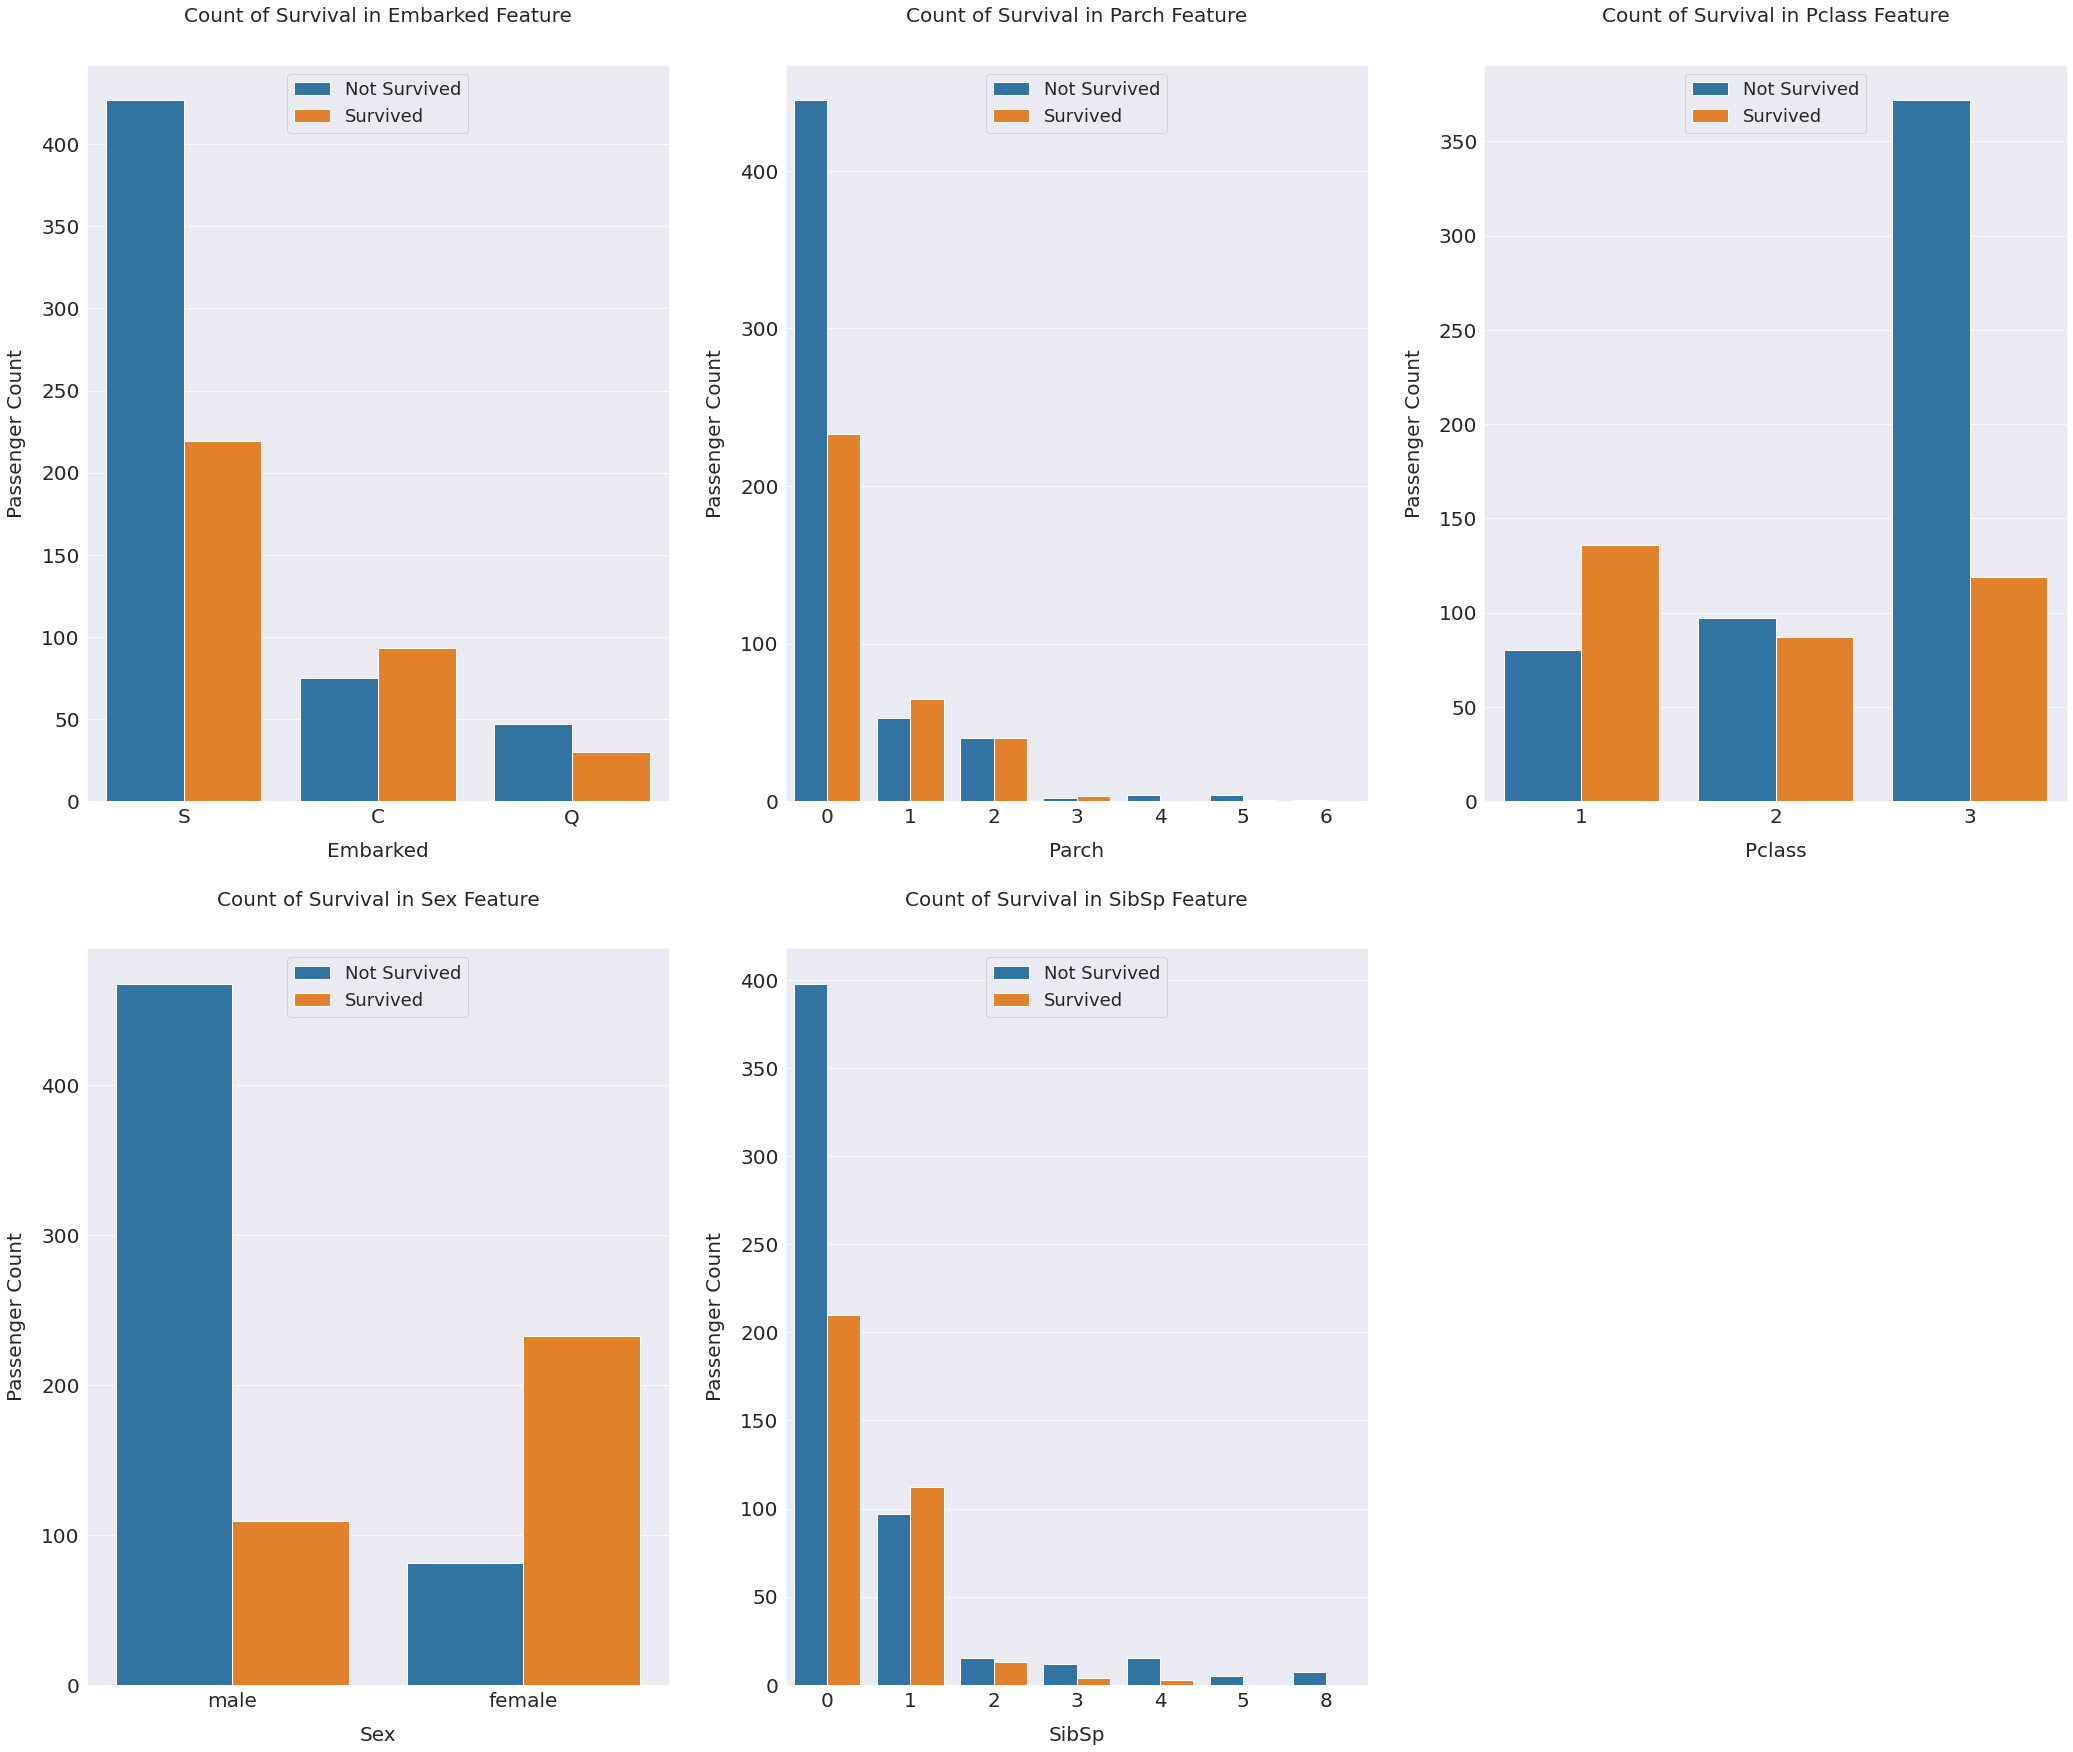

In [ ]:
cat_features = ['Embarked', 'Parch', 'Pclass', 'Sex', 'SibSp']

fig, axs = plt.subplots(ncols=2, nrows=3, figsize=(20, 20))
plt.subplots_adjust(right=1.5, top=1.25)

for i, feature in enumerate(cat_features, 1):    
    plt.subplot(2, 3, i)
    sns.countplot(x=feature, hue='Survived', data=df_train)
    
    plt.xlabel('{}'.format(feature), size=20, labelpad=15)
    plt.ylabel('Passenger Count', size=20, labelpad=15)    
    plt.tick_params(axis='x', labelsize=20)
    plt.tick_params(axis='y', labelsize=20)
    
    plt.legend(['Not Survived', 'Survived'], loc='upper center', prop={'size': 18})
    plt.title('Count of Survival in {} Feature'.format(feature), size=20, y=1.05)

plt.show()

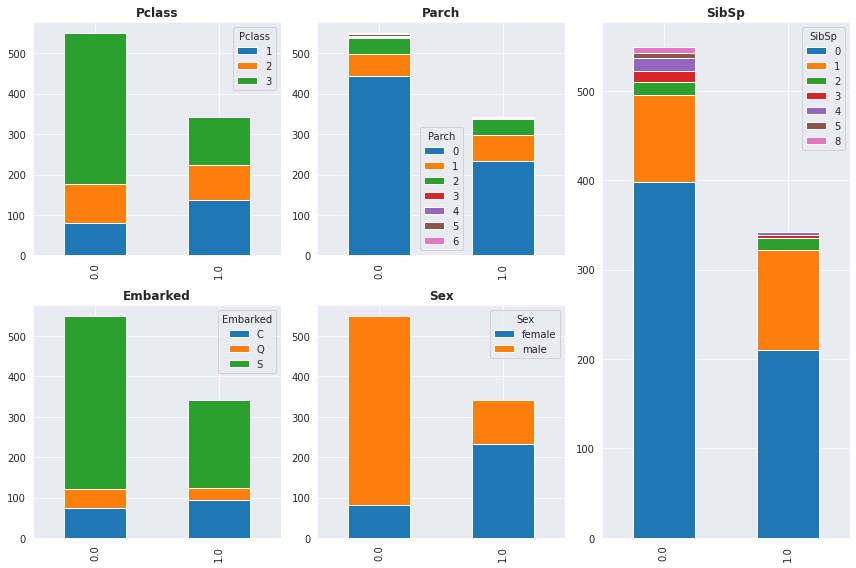

In [ ]:
columns=['Pclass','Parch','Embarked','Sex','SibSp']

n_rows=2
n_cols=3

# Create a figure and subplot object
fig=plt.figure(figsize=(12,8))
ax1=plt.subplot(231);ax2=plt.subplot(232);ax3=plt.subplot(234);ax4=plt.subplot(235);ax5=plt.subplot(133)
ax=[ax1,ax2,ax3,ax4,ax5]

for axis in ax:
        group=df_train.groupby([columns[ax.index(axis)],'Survived'])
        group1=group.size().reset_index().pivot(columns=columns[ax.index(axis)],index='Survived',values=0)
        group1.plot(kind='bar', stacked=True,ax=axis)
        sns.set_style('darkgrid')
        axis.set_title(columns[ax.index(axis)],fontweight='semibold')
        axis.set_xlabel('')
        
plt.tight_layout()

##Insights:


1.   Pclass :: Passengers in 1st class had a higher chance of survival, then followed by 2nd class and then 3rd class.
2.   Parch :: Passengers with atleast one parent/child had a higher chance of survival.
3.   SibSp :: Passengers with 1 or 2 siblings/spouse had a higher chance of survival.
4.   Embarked :: Passengers embarked from 'Cherboug' survived the most,followed by 'Southhampton' and 'Queenstown'.
5.   Sex :: Female passengers had a higher chance of survival than male passengers.

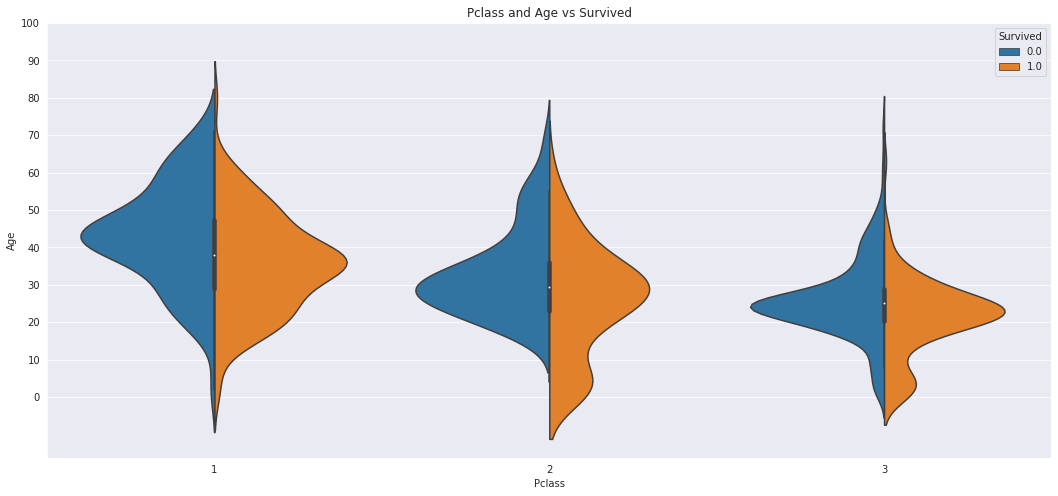

In [ ]:
f,ax=plt.subplots(figsize=(18,8))

sns.violinplot("Pclass","Age", hue="Survived", data=df_train,split=True,ax=ax)

ax.set_title('Pclass and Age vs Survived')

ax.set_yticks(range(0,110,10)) # set_yticks() function in axes module is used to Set the y ticks with list of ticks.

plt.show()

##Observation
1.   The number of children increases with Pclass and the survival rate for passengers below Age 10(i.e children) is good irrespective of the Pclass.

2. Survival chances for Passenegers aged 20-50 from Pclass1 is high. 

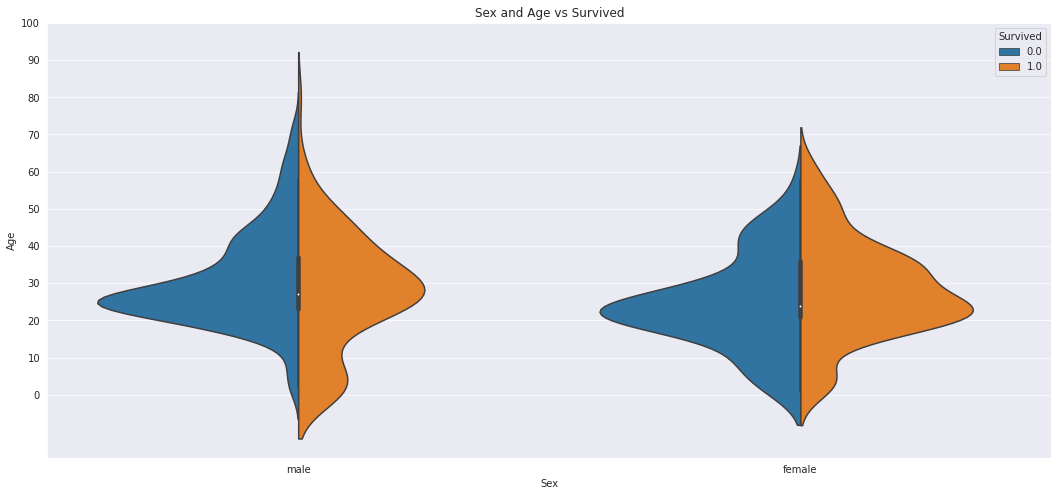

In [ ]:
f,ax=plt.subplots(figsize=(18,8))

sns.violinplot("Sex","Age", hue="Survived", data=df_train,split=True,ax=ax)

ax.set_title('Sex and Age vs Survived') # setting the title of plot

ax.set_yticks(range(0,110,10))

plt.show()

3.  Men have a high probability of survival when they are between 18 and 30 years old. For men the probability of survival is very low between the age of 5 and 18.

4.  For women the survival chances are higher between 14 and 40.

In [ ]:
for j in ['Sex','Embarked']:
    df_train[j],unique=pd.factorize(df_train[j])

Text(0.5, 1.0, 'Correlation Matrix')

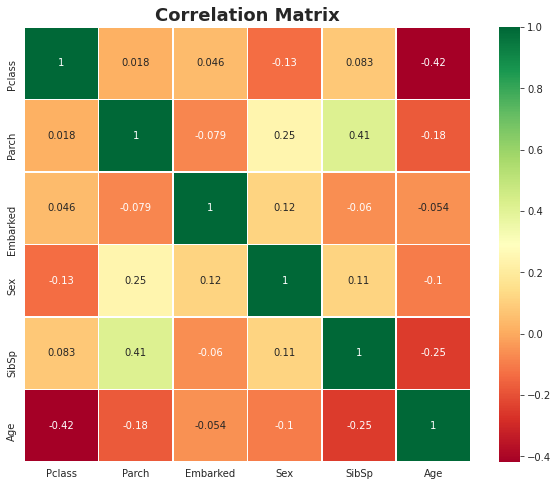

In [ ]:
corr_matrix=df_train[['Pclass','Parch','Embarked','Sex','SibSp','Age']].corr()
fig,axis=plt.subplots(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True,ax=axis,cmap="RdYlGn",linewidth=.5,linecolor='white')
axis.set_title('Correlation Matrix',fontweight='semibold',fontsize=18)

# Machine Learning Models

In [ ]:
one_hot_columns=['Pclass','Embarked','Sex']

for c in one_hot_columns:
    df_train=pd.get_dummies(df_train,columns=[c])

for c in one_hot_columns:
    df_test=pd.get_dummies(df_test,columns=[c])

#Model preparation
df_train.drop(['PassengerId','Fare','Name','Ticket'],axis=1,inplace=True)

In [ ]:
#Convert Pandas Df to Numpy array
X_train=df_train.drop(['Survived'],axis=1).to_numpy(dtype=float)    #Dropping Output from training dataset
Y_train=df_train['Survived'].to_numpy()
X_test=df_test.drop(['PassengerId','Fare','Name','Ticket','Survived'],axis=1).to_numpy(dtype=float)
Y_test=df_test.drop(['PassengerId','Fare','Name','Ticket'],axis=1)


In [ ]:
X_train.shape

(891, 11)

In [ ]:
X_test.shape

(418, 11)

##Logistic Regression

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train,Y_train)

logreg_pred = logreg.predict(X_test)

Score = logreg.score(X_train,Y_train)
print('Score for Logistic Regression model is :: {:.2f}'.format(Score*100))

#Output_df=pd.DataFrame({'PassengerId':df_test.PassengerId, 'Survived':logreg_pred})

Score for Logistic Regression model is :: 81.26


##K-Nearest Neighbourhood

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 3) 
knn.fit(X_train, Y_train)  

knn_pred = knn.predict(X_test)  

Score = knn.score(X_train, Y_train)
print('Score for K-Nearest Neighbourhood model is :: {:.2f}'.format(Score*100))

#Output_df=pd.DataFrame({'PassengerId':df_test.PassengerId, 'Survived':decision_tree_pred})

Score for K-Nearest Neighbourhood model is :: 86.64


##Decision Tree

In [ ]:
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X_train, Y_train)  

decision_tree_pred = decision_tree.predict(X_test)

Score = decision_tree.score(X_train, Y_train)
print('Score for Decision Tree model is :: {:.2f}'.format(Score*100))

#Output_df=pd.DataFrame({'PassengerId':df_test.PassengerId, 'Survived':decision_tree_pred})

Score for Decision Tree model is :: 93.49


##Random Forest

In [ ]:
random_forest = RandomForestClassifier(n_estimators=100) 
random_forest.fit(X_train, Y_train)

random_forest_pred = random_forest.predict(X_test)

Score = random_forest.score(X_train, Y_train) 
print('Score for Random Forest model is :: {:.2f}'.format(Score*100))

#print('Random Forest')
#print(classification_report(Y_test,random_forest_pred))

#sns.barplot(random_forest_pred, Y_test) 
#plt.show()

Score for Random Forest model is :: 93.49


# Result 
As we can see, the Random Forest and Decision Tree has same score and these classifier goes on the first place as both have the highest prediction score.




Feature: Age, Score: 0.37819
Feature: Parch, Score: 0.05363
Feature: SipSp, Score: 0.06714
Feature: Pclass_1, Score: 0.03679
Feature: Pclass_2, Score: 0.02099
Feature: Pclass_3, Score: 0.07168
Feature: Embarked_0, Score: 0.01501
Feature: Embarked_1, Score: 0.01390
Feature: Embarked_2, Score: 0.00929
Feature: Sex_0, Score: 0.18594
Feature: Sex_1, Score: 0.14745


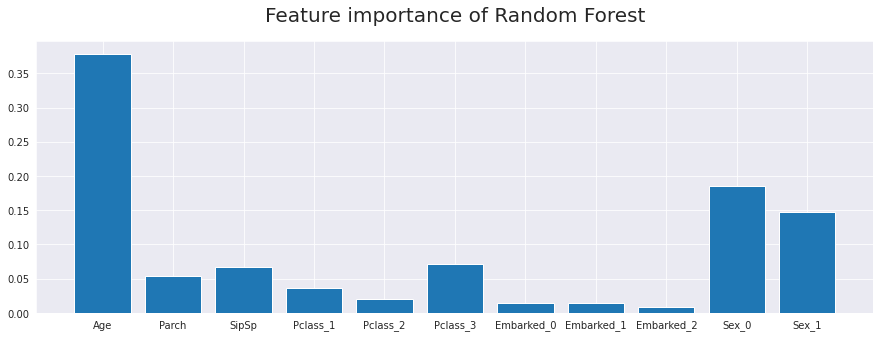

In [ ]:
importance = random_forest.feature_importances_
feature=['Age','Parch','SipSp','Pclass_1','Pclass_2','Pclass_3','Embarked_0','Embarked_1','Embarked_2','Sex_0','Sex_1']
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: {}, Score: {:.5f}'.format(feature[i],v))
# plot feature importance
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(15, 5))
plt.title('Feature importance of Random Forest', size=20, y=1.05)
plt.bar(feature, importance)
plt.show()

Feature: Age, Score: 0.30960
Feature: Parch, Score: 0.04064
Feature: SipSp, Score: 0.09411
Feature: Pclass_1, Score: 0.03321
Feature: Pclass_2, Score: 0.00036
Feature: Pclass_3, Score: 0.10206
Feature: Embarked_0, Score: 0.03236
Feature: Embarked_1, Score: 0.01828
Feature: Embarked_2, Score: 0.00593
Feature: Sex_0, Score: 0.00000
Feature: Sex_1, Score: 0.36347


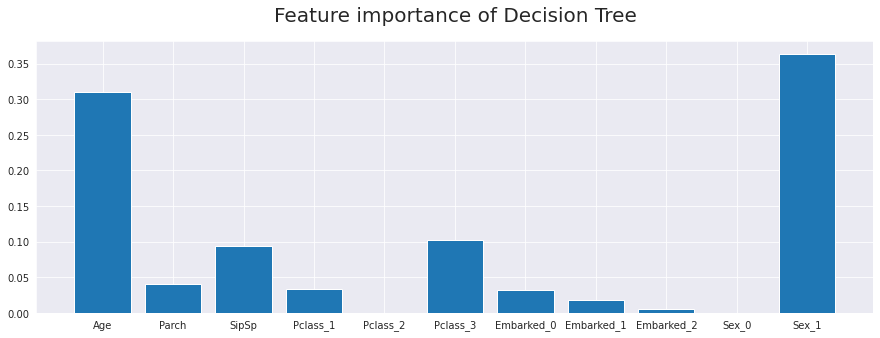

In [ ]:
importance = decision_tree.feature_importances_
feature=['Age','Parch','SipSp','Pclass_1','Pclass_2','Pclass_3','Embarked_0','Embarked_1','Embarked_2','Sex_0','Sex_1']
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: {}, Score: {:.5f}'.format(feature[i],v))
# plot feature importance
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(15, 5))
plt.title('Feature importance of Decision Tree', size=20, y=1.05)
plt.bar(feature, importance)
plt.show()


Using feature_importances_ function in Decision Tree and Random Forest we saw both give importance to different features but have the same prediction probability.

In [ ]:
Output_df=pd.DataFrame({'PassengerId':df_test.PassengerId, 'Survived':random_forest_pred})
print(Output_df)
Output_df.to_csv('Output.csv',index=0)

      PassengerId  Survived
891           892       1.0
892           893       0.0
893           894       1.0
894           895       0.0
895           896       0.0
...           ...       ...
1304         1305       1.0
1305         1306       0.0
1306         1307       0.0
1307         1308       1.0
1308         1309       0.0

[418 rows x 2 columns]
